#Training Long Short Term Memory (LSTM) in keras

The recurrent neural network is the most suitable model to learn the sequential data. In this tutorial, we shall build a simple LSTM model to learn and generate sine function, $y=sin(w*x)$. This probably isn’t a best practical use case, but it’s good starting point for learning and playing with LSTMs.

# Prepare Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def train_function(x):
    return np.sin(x)

def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)


Length of the training sequence is 3142


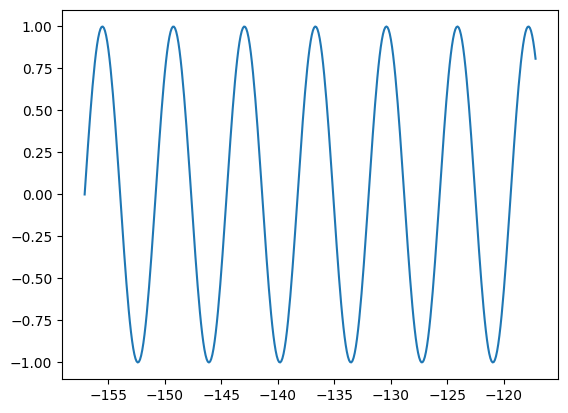

In [2]:
# define input sequence
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
print(f'Length of the training sequence is {len(train_seq)}')

plt.plot(xaxis[:400], train_seq[:400], label="Data")
# plt.plot(xaxis, train_seq, label="predicitons")

In [3]:
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))


X.shape = (3122, 20, 1)
y.shape = (3122,)


In [4]:
print(X[0])
print(y[0])

[[-9.82193362e-16]
 [ 9.98334166e-02]
 [ 1.98669331e-01]
 [ 2.95520207e-01]
 [ 3.89418342e-01]
 [ 4.79425539e-01]
 [ 5.64642473e-01]
 [ 6.44217687e-01]
 [ 7.17356091e-01]
 [ 7.83326910e-01]
 [ 8.41470985e-01]
 [ 8.91207360e-01]
 [ 9.32039086e-01]
 [ 9.63558185e-01]
 [ 9.85449730e-01]
 [ 9.97494987e-01]
 [ 9.99573603e-01]
 [ 9.91664810e-01]
 [ 9.73847631e-01]
 [ 9.46300088e-01]]
0.9092974268257294


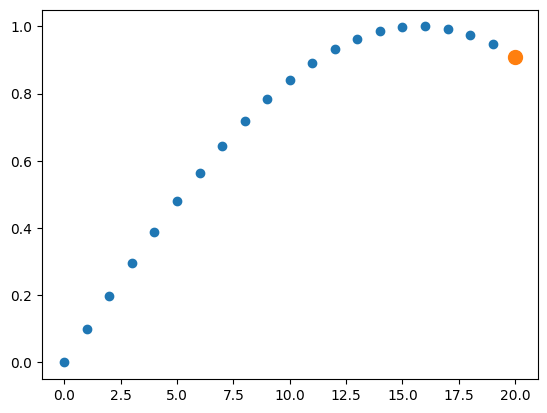

In [5]:
plt.scatter(range(0,20),X[0,:])
plt.scatter(20,y[0],s=100)
plt.show()

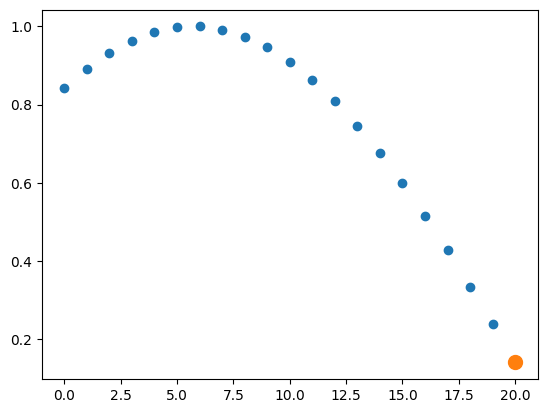

In [6]:
plt.scatter(range(0,20),X[10,:,0])
plt.scatter(20,y[10],s=100)
plt.show()

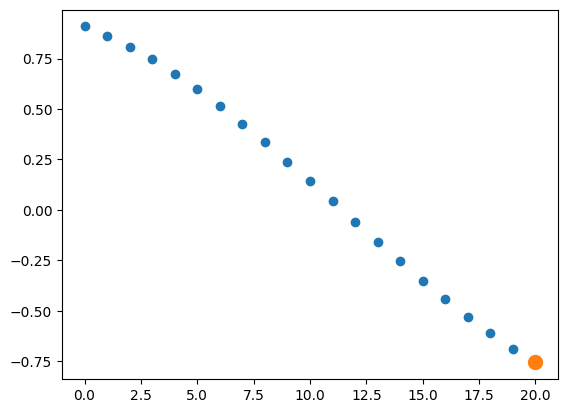

In [7]:
plt.scatter(range(0,20),X[20])
plt.scatter(20,y[20],s=100)
plt.show()

# Visualisation of an LSTM Model

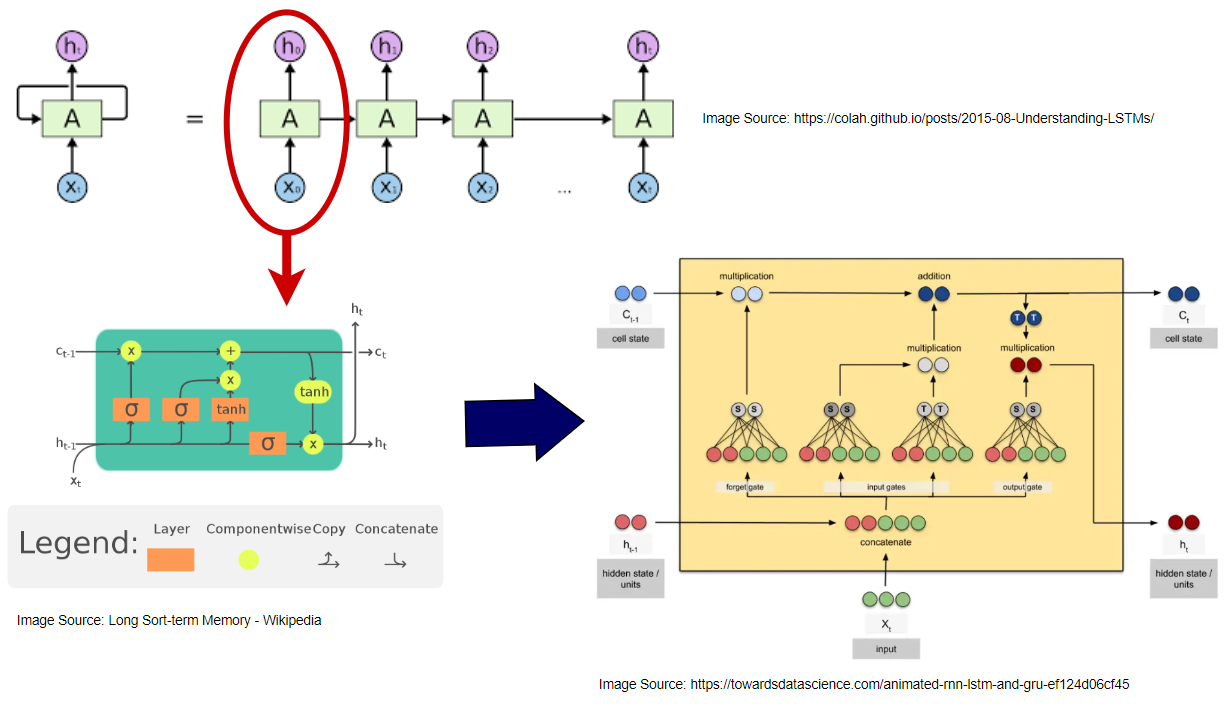

# Visualising a multi-layered LSTM

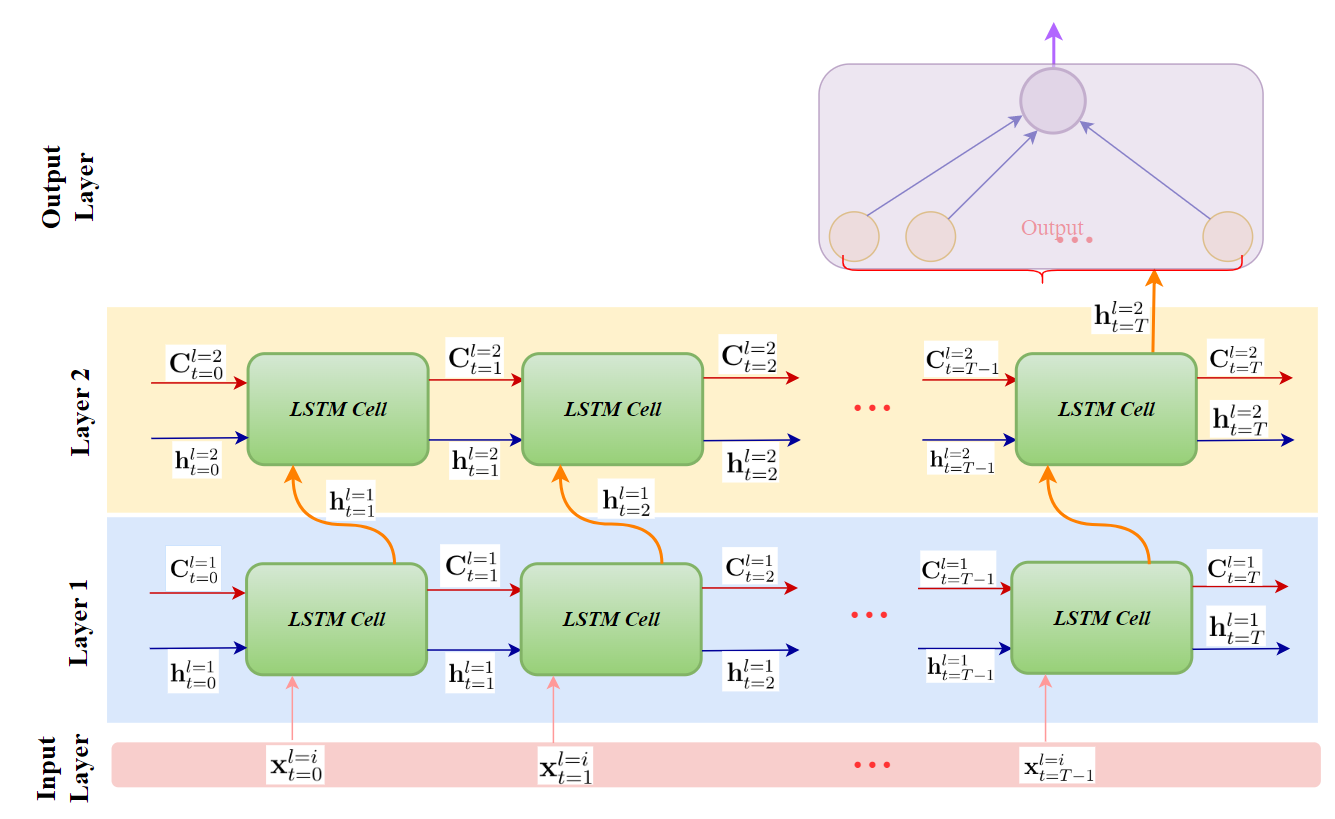

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(10, input_shape=(20, 1), activation='tanh', recurrent_activation="sigmoid", return_sequences=True)) #(10 + 1)*10 + 10 = 120 * 4 = 480
model.add(LSTM(5, activation='tanh', return_sequences=False)) # (5+10)*5 + 5 = 80*4 = 320
model.add(Dense(1, activation='tanh')) # 5 * 1 + 1 = 6

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 20, 10)            480       
                                                                 
 lstm_11 (LSTM)              (None, 5)                 320       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 806 (3.15 KB)
Trainable params: 806 (3.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training the model

Epoch 1/20
98/98 [==============================] - 6s 18ms/step - loss: 0.0836
Epoch 2/20
98/98 [==============================] - 3s 26ms/step - loss: 0.0113
Epoch 3/20
98/98 [==============================] - 2s 22ms/step - loss: 0.0055
Epoch 4/20
98/98 [==============================] - 2s 17ms/step - loss: 0.0022
Epoch 5/20
98/98 [==============================] - 2s 19ms/step - loss: 9.5477e-04
Epoch 6/20
98/98 [==============================] - 2s 19ms/step - loss: 4.8084e-04
Epoch 7/20
98/98 [==============================] - 2s 19ms/step - loss: 2.9450e-04
Epoch 8/20
98/98 [==============================] - 2s 19ms/step - loss: 2.0937e-04
Epoch 9/20
98/98 [==============================] - 3s 28ms/step - loss: 1.6136e-04
Epoch 10/20
98/98 [==============================] - 2s 18ms/step - loss: 1.2800e-04
Epoch 11/20
98/98 [==============================] - 2s 20ms/step - loss: 1.0226e-04
Epoch 12/20
98/98 [==============================] - 2s 16ms/step - loss: 8.4718e-05
Epoch

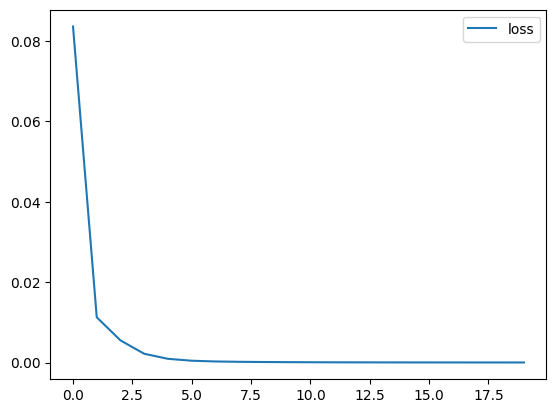

In [14]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=20)
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

# Test the Model on Sine Function

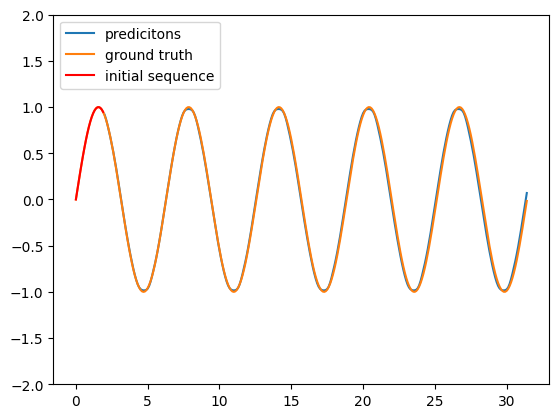

In [15]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.sin(x)
calc_y = test_function(test_xaxis)

# start with initial n values, rest will be predicted
test_y = calc_y[:n_steps]

for i in range(len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)


plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="predicitons")
plt.plot(test_xaxis, calc_y, label="ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="initial sequence", color="red")
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

# Test the Model on Cosine Function

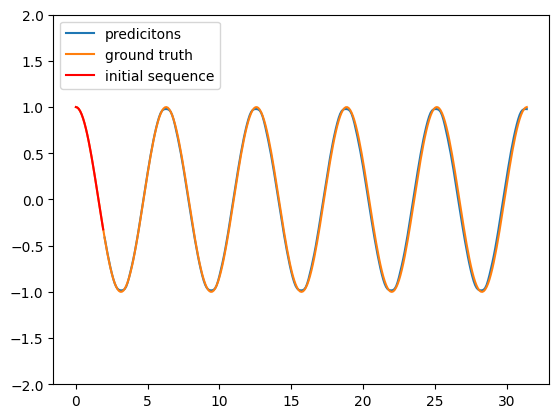

In [16]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.cos(x)
calc_y = test_function(test_xaxis)

# start with initial n values, rest will be predicted
test_y = calc_y[:n_steps]

for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="predicitons")
plt.plot(test_xaxis, calc_y, label="ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="initial sequence", color="red")
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()